In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv(r"C:\Users\Kedar\Downloads\dataset updated.csv")

In [9]:
#Overall Data Analysis
#Total number of products
print("Total number of products: ",len(df))
#Average rating across all products
print("Average rating of all Products: ",df["Ratings"].mean())
#Most common skincare concerns
print("The most common skincare concern: ",df["Concern"].mode()[0])
#Average price of all products
print("Average price of all products is: ",df["Price"].mean())

Total number of products:  214
Average rating of all Products:  5.266355140186916
The most common skincare concern:  Sun protection
Average price of all products is:  909.892523364486


In [11]:
#Skin Type Analysis
#Number of products per skin type
categories=["normal","oily","dry","sensitive","combination"]
skintype_counts = {cat: df['Skin type'].str.contains(cat, case=False, na=False).sum() for cat in categories}
skintype_count_df=pd.DataFrame(list(skintype_counts.items()), columns=['Skin Type', 'Count'],
                               index=[1,2,3,4,5])
print("The number of products per skin type are\n",skintype_count_df)
#Average rating per skin type
avg_ratings={cat: df.loc[df['Skin type'].str.contains(cat, case=False, na=False), 'Ratings'].mean() for cat in categories}
avg_ratings_df=pd.DataFrame(list(avg_ratings.items()), columns=['Skin Type', 'Average Rating'])
avg_ratings_df=avg_ratings_df.sort_values(by='Average Rating', ascending=False)
print("The average rating per skin type is\n", avg_ratings_df)
#Average price of products per skin type
avg_price={cat: df.loc[df['Skin type'].str.contains(cat, case=False, na=False), 'Price'].mean() for cat in categories}
avg_price_df=pd.DataFrame(list(avg_price.items()), columns=['Skin Type', 'Average Price'])
avg_price_df=avg_price_df.sort_values(by='Average Price', ascending=False)
print("The average price of products per skin type is\n", avg_price_df)

The number of products per skin type are
      Skin Type  Count
1       normal    101
2         oily    115
3          dry    125
4    sensitive     91
5  combination    102
The average rating per skin type is
      Skin Type  Average Rating
0       normal        5.326733
2          dry        5.288000
3    sensitive        5.043956
1         oily        4.973913
4  combination        4.931373
The average price of products per skin type is
      Skin Type  Average Price
4  combination     951.892157
0       normal     929.386139
2          dry     928.376000
1         oily     925.939130
3    sensitive     894.428571


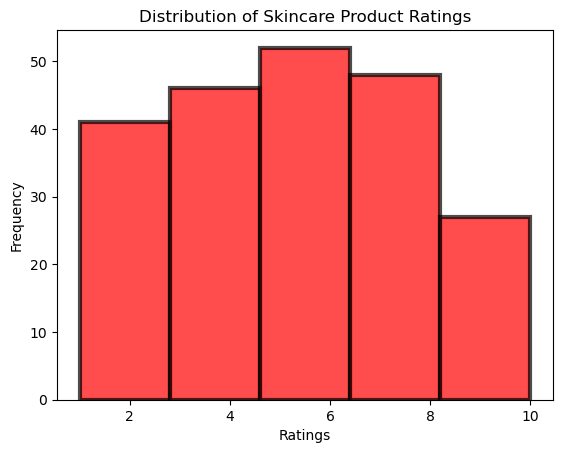

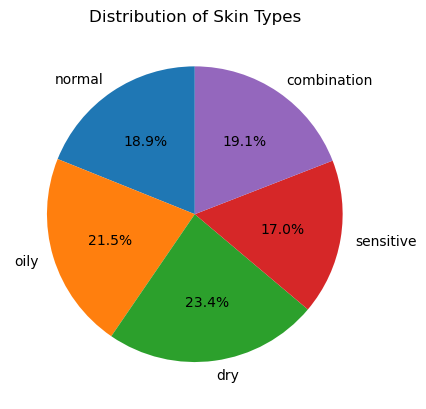

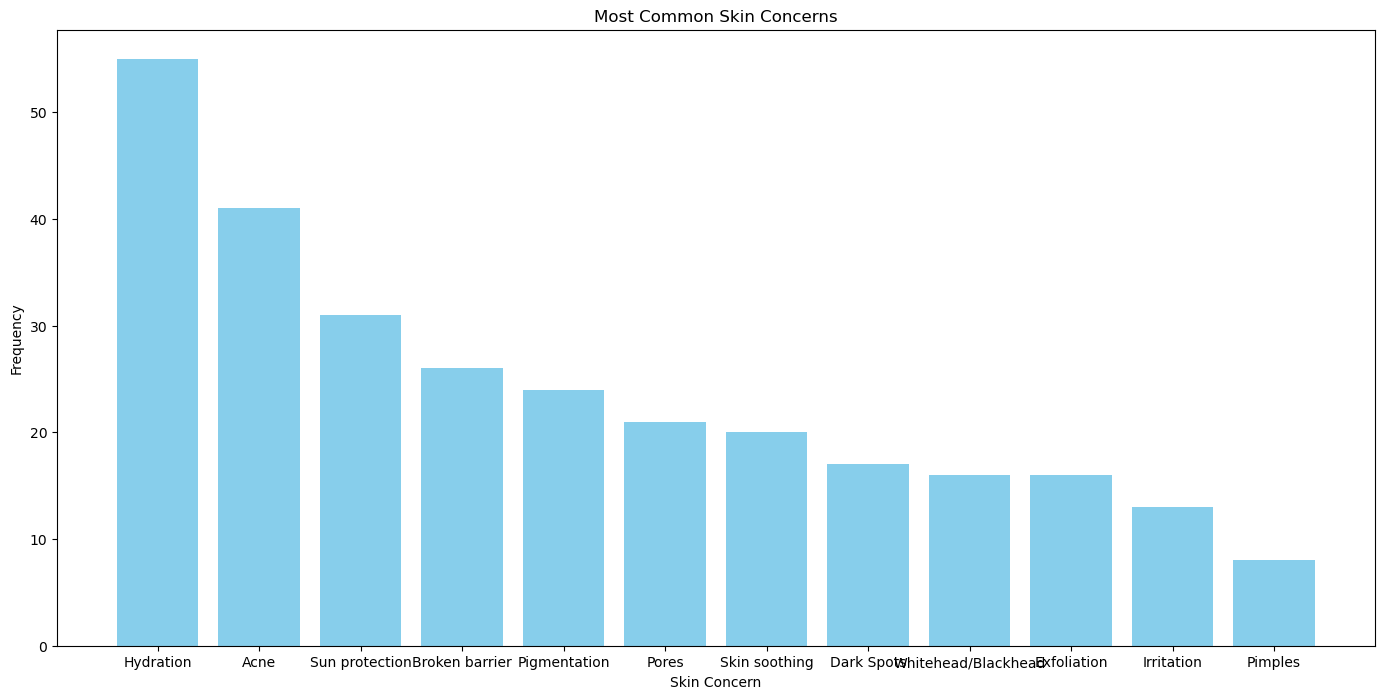

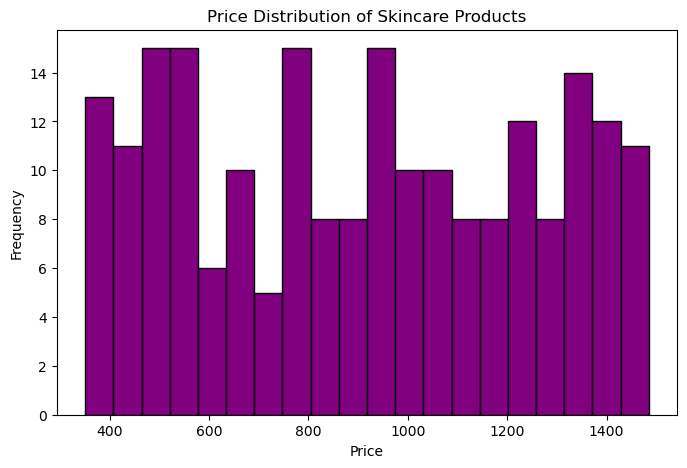

In [13]:
#Effectiveness Analysis
#Histogram of distribution of product ratings
y=df["Ratings"]
plt.hist(y,bins=5,color="red",edgecolor="black", alpha=0.7,linewidth=3,label="Product Ratings")
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.title("Distribution of Skincare Product Ratings")
plt.show()
#Pie Chart of most common skin type
categories=["normal","oily","dry","sensitive","combination"]
skintype_counts = {cat: df['Skin type'].str.contains(cat, case=False, na=False).sum() for cat in categories}
skintype_count_df=pd.DataFrame(list(skintype_counts.items()), columns=['Skin Type', 'Count'])
plt.pie(skintype_count_df["Count"], labels=skintype_count_df['Skin Type'], autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Skin Types")
plt.show()
#Bar Chart of distribution of skin concerns
df1=df.copy()
df1['Concern'] = df1['Concern'].str.split(',')
df1 = df1.explode('Concern')
df1['Concern'] = df1['Concern'].str.strip()
concern_counts = df1['Concern'].value_counts()
plt.figure(figsize=(17, 8))
plt.bar(concern_counts.index, concern_counts.values, color='skyblue')
plt.xlabel('Skin Concern')
plt.ylabel('Frequency')
plt.title('Most Common Skin Concerns')
plt.show()
#Histogram of distribution of product price
plt.figure(figsize=(8, 5))
plt.hist(df['Price'], bins=20, color='purple', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution of Skincare Products')
plt.show()

In [19]:
#Comparision Table
num_products = int(input("Enter number of products to compare: "))
if num_products < 2 or num_products > 5:
    print("You can only compare 2-5 products at once.")
else:
    selected_products = []
    for i in range(num_products):
        product_name = input(f"Enter Product {i+1} name: ")
        selected_products.append(product_name)
    comparison_df = df[df["Product"].isin(selected_products)]
    if not comparison_df.empty:
        print("\nComparison of Selected Products:")
        print(comparison_df)
    else:
        print("Product not found.")

Enter number of products to compare:  2
Enter Product 1 name:  f
Enter Product 2 name:  h


Product not found.


In [21]:
#Sorting values in the dataset on the basis of Price and Ratings
#Price low to high
P_lowtohigh= df.sort_values(by="Price", ascending=True)
print(P_lowtohigh)
#Price high to low
P_hightolow= df.sort_values(by="Price", ascending=False)
print(P_hightolow)
#Rating high to low
R_hightolow= df.sort_values(by="Ratings", ascending=False)
print(R_hightolow)

                                 Skin type  \
124  Normal,Dry,Combination,Oily,Sensitive   
35                    Normal,Dry,Sensitive   
69                   Sensitive,Combination   
81   Normal,Dry,Combination,Oily,Sensitive   
68                              Normal,Dry   
..                                     ...   
197             Combination,Oily,Sensitive   
136  Normal,Dry,Combination,Oily,Sensitive   
48                           Dry,Sensitive   
107                            Combination   
205  Normal,Dry,Combination,Oily,Sensitive   

                                               Product  \
124  Fixderma 10% Tranexamic Acid Pigment Correctin...   
35                        Cerene Hydrating Cloud Cream   
69                                   Ethiglo Face Wash   
81                                  REJUGLOW Face Wash   
68   Sun’nil Jojoba-Grapeseed Moisturising Sun Prot...   
..                                                 ...   
197                                 Dermo